In [1]:
# from crewai import Agent, Task, Crew
# from langchain_community.llms import Ollama
# import yaml

# # Inicializa o LLM do Ollama
# llm = Ollama(model="ollama/mistral", base_url="http://localhost:11434")

# def carregar_yaml(path):
#     with open(path, 'r', encoding='utf-8') as f:
#         return yaml.safe_load(f)

# # === 1. Carregar agente e tarefa de análise de dados ===
# agent1_cfg = carregar_yaml("agents/analyze_data.yaml")
# task1_cfg = agent1_cfg["analyze_data"]

# agent_analyze = Agent(
#     role=task1_cfg["role"],
#     goal=task1_cfg["goal"],
#     backstory=task1_cfg["backstory"],
#     llm=llm,
#     verbose=False
# )

# # carrega tarefa yaml
# tarefa1_cfg = carregar_yaml("tasks/task_analyzer_data.yaml")
# tarefa1_data = tarefa1_cfg["task_analyze_data"]
# task_analyze = Task(
#     description=tarefa1_data["description"],
#     expected_output=tarefa1_data["expected_output"],
#     agent=agent_analyze
# )

# # === Executar a primeira tarefa ===
# crew1 = Crew(agents=[agent_analyze], tasks=[task_analyze], verbose=False)
# output_analise = crew1.kickoff()

# # Salvar saída textual da análise (só insights, não gráficos)
# with open("output_tables/resumo_analyze_data.md", "w", encoding="utf-8") as f:
#     f.write(str(output_analise))

# # === 2. Carregar agente e tarefa do estrategista ===
# agent2_cfg = carregar_yaml("agents/estrategista_de_produto.yaml")
# task2_cfg = agent2_cfg["estrategista_de_produto"]


# agent_estrategista = Agent(
#     role=task2_cfg["role"],
#     goal=task2_cfg["goal"],
#     backstory=task2_cfg["backstory"],
#     llm=llm,
#     verbose=False
# )

# # Aqui o estrategista já tem acesso aos arquivos gerados e ao texto da análise
# tarefa2_cfg = carregar_yaml("tasks/task_estrategista_de_produto.yaml")
# tarefa2_data = tarefa2_cfg["task_estrategista_de_produto"]
# task_estrategista = Task(
#     description=tarefa2_data["description"],
#     expected_output=tarefa2_data["expected_output"],
#     agent=agent_estrategista
# )

# # === Executar a segunda tarefa ===
# crew2 = Crew(agents=[agent_estrategista], tasks=[task_estrategista], verbose=False)
# relatorio_final = crew2.kickoff()

# # Salvar o relatório final
# with open("relatorio_final.md", "w", encoding="utf-8") as f:
#     f.write(str(relatorio_final))


C:\Users\vinic\AppData\Local\Temp\ipykernel_13332\2401181374.py:10: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="ollama/mistral", base_url="http://localhost:11434")



=== Executando bloco de código 1 ===
Bloco 1 executado com sucesso.

=== Executando bloco de código 1 ===
Bloco 1 executado com sucesso.


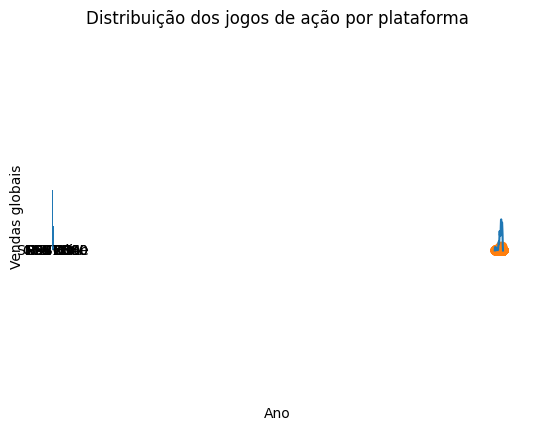

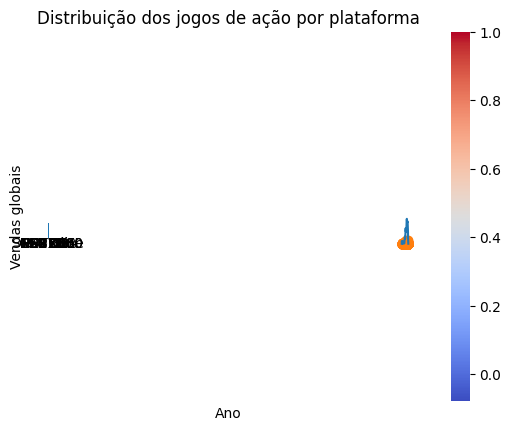

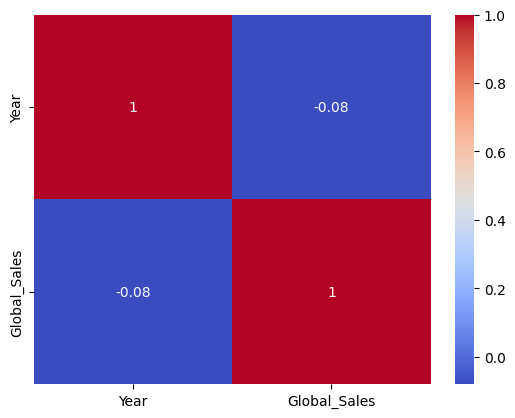

In [2]:
from crewai import Agent, Task, Crew
from langchain_community.llms import Ollama
import yaml
import os
import pandas as pd
import re
import textwrap

# Inicializa o LLM do Ollama
llm = Ollama(model="ollama/mistral", base_url="http://localhost:11434")

# Função para carregar arquivos YAML
def carregar_yaml(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return yaml.safe_load(file)

# === 1. Carregar Agente e Tarefa de Análise de Dados ===
agent1_cfg = carregar_yaml("agents/analyze_data.yaml")
task1_cfg = agent1_cfg["analyze_data"]

agent_analyze = Agent(
    role=task1_cfg["role"],
    goal=task1_cfg["goal"],
    backstory=task1_cfg["backstory"],
    llm=llm,
    verbose=False
)
# carrega tarefa yaml
tarefa1_cfg = carregar_yaml("tasks/task_analyzer_data.yaml")
tarefa1_data = tarefa1_cfg["task_analyze_data"]
task_analyze = Task(
    description=tarefa1_data["description"],
    expected_output=tarefa1_data["expected_output"],
    agent=agent_analyze
)

task_analyze = Task(
    description=tarefa1_data["description"],
    expected_output=tarefa1_data["expected_output"],
    agent=agent_analyze
)

# Executar a tarefa de análise de dados
crew1 = Crew(agents=[agent_analyze], tasks=[task_analyze], verbose=False)
output_analise = crew1.kickoff()

# Criar pasta de saída, se não existir
os.makedirs("output_tables", exist_ok=True)

# Salvar o resumo textual da análise em Markdown
with open("output_tables/resumo_analyze_data.md", "w", encoding="utf-8") as f:
    f.write(str(output_analise))

### LER O ARQUIVO MKDOW E GERAR OS GRÁFICOS E TABELAS

# Converta CrewOutput para string antes de aplicar regex
if hasattr(output_analise, 'raw_output'):
    markdown_str = output_analise.raw_output
else:
    markdown_str = str(output_analise)
    
def extrair_e_executar_codigo(markdown):
    blocos = re.findall(r"```(?:python)?(.*?)```", markdown, re.DOTALL)
    for i, bloco in enumerate(blocos, start=1):
        bloco_limpo = textwrap.dedent(bloco)
        print(f"\n=== Executando bloco de código {i} ===")
        try:
            exec(bloco_limpo, globals())
            print(f"Bloco {i} executado com sucesso.")
        except Exception as e:
            print(f"Erro no bloco {i}: {e}")
            # Aqui não fazemos raise, então seguimos para o próximo bloco.

# Uso:
if hasattr(output_analise, "raw_output"):
    markdown_str = output_analise.raw_output
else:
    markdown_str = str(output_analise)

extrair_e_executar_codigo(markdown_str)

# def extrair_e_executar_codigo(markdown):
#     blocos = re.findall(r"```(?:python)?(.*?)```", markdown, re.DOTALL)
#     for i, bloco in enumerate(blocos):
#         print(f"\nExecutando bloco de código {i+1}...")
#         try:
#             bloco_limpo = textwrap.dedent(bloco)
#             exec(bloco_limpo, globals())
#         except Exception as e:
#             print(f"Erro ao executar código gerado: {e}")

# Suponha que markdown_str já esteja definido corretamente
extrair_e_executar_codigo(markdown_str)


# === 2. Carregar agente e tarefa do estrategista ===
agent2_cfg = carregar_yaml("agents/estrategista_de_produto.yaml")
task2_cfg = agent2_cfg["estrategista_de_produto"]

agent_estrategista = Agent(
    role=task2_cfg["role"],
    goal=task2_cfg["goal"],
    backstory=task2_cfg["backstory"],
    llm=llm,
    verbose=False
)

# Antes de criar a task, ler o resumo e converter CSVs para Markdown
def converter_csv_para_markdown(path_csv):
    df = pd.read_csv(path_csv)
    return df.to_markdown(index=False)

# Ler resumo textual
a_resumo = open("output_tables/resumo_analyze_data.md", "r", encoding="utf-8").read()

# Listar arquivos CSV e gerar Markdown para cada tabela
tabelas_md = ""
for arquivo in os.listdir("output_tables"):
    if arquivo.endswith(".csv"):
        caminho_csv = f"output_tables/{arquivo}"
        tabelas_md += f"## Tabela: {arquivo}\n" + converter_csv_para_markdown(caminho_csv) + "\n\n"

# Listar gráficos e montar seção de imagens_markdown
graficos_md = ""
for arquivo in os.listdir("output_tables"):
    if arquivo.endswith(".png"):
        graficos_md += f"## Gráfico: {arquivo}\n"
        graficos_md += f"![{arquivo}](output_tables/{arquivo})\n\n"


# Aqui o estrategista já tem acesso aos arquivos gerados e ao texto da análise
tarefa2_cfg = carregar_yaml("tasks/task_estrategista_de_produto.yaml")
tarefa2_data = tarefa2_cfg["task_estrategista_de_produto"]


# Montar descrição final da tarefa do estrategista, incluindo contextos
descricao_estrategista = tarefa2_data["description"] + f"\n\n# Contexto Automático\n{a_resumo}\n\n{tabelas_md}\n{graficos_md}"

task_estrategista = Task(
    description=descricao_estrategista,
    expected_output=tarefa2_data["expected_output"],
    agent=agent_estrategista
)

# Executar a tarefa do estrategista
crew2 = Crew(agents=[agent_estrategista], tasks=[task_estrategista], verbose=False)
relatorio_final = crew2.kickoff()

# Salvar relatório final
with open("relatorio_final.md", "w", encoding="utf-8") as f:
    f.write(str(relatorio_final))